# WITH PANDAS AND MATPLOTLIB

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
import warnings
warnings.filterwarnings('ignore')
from matplotlib import style 

# Yeni Bölüm

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


INSTRUCTIONS

1. Number of people by gender
1. Kill weapon
1. Age of killed people
1. Race of killed people
1. Killed People According to Races (Pie Chart)
1. Most common 15 Name or Surname of killed people

<br>

read data

if didn't work you can use this parameters: encoding="windows-1252"

In [4]:
kill = pd.read_csv('/content/drive/MyDrive/PoliceKillingsUS.csv', encoding="windows-1252")

## 1: Plot number of people by gender

In [ ]:
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [ ]:
kill.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2535 entries, 0 to 2534
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       2535 non-null   int64  
 1   name                     2535 non-null   object 
 2   date                     2535 non-null   object 
 3   manner_of_death          2535 non-null   object 
 4   armed                    2526 non-null   object 
 5   age                      2458 non-null   float64
 6   gender                   2535 non-null   object 
 7   race                     2340 non-null   object 
 8   city                     2535 non-null   object 
 9   state                    2535 non-null   object 
 10  signs_of_mental_illness  2535 non-null   bool   
 11  threat_level             2535 non-null   object 
 12  flee                     2470 non-null   object 
 13  body_camera              2535 non-null   bool   
dtypes: bool(2), float64(1), 

In [6]:
Toplam=kill.groupby(["gender"])["gender"].count()
Toplam

gender
F     107
M    2428
Name: gender, dtype: int64

In [8]:
Toplam.index

Index(['F', 'M'], dtype='object', name='gender')

In [17]:
A=kill[kill["gender"]=="F"]["gender"].count() # olmadı


In [18]:
B=kill[kill["gender"]=="M"]["gender"].count() # olmadı



In [31]:
Toplamm= kill.groupby(kill["gender"]).count()
TersToplamm= Toplamm[::-1]
TersToplamm

,id,name,date,manner_of_death,armed,age,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
gender,,,,,,,,,,,,,
M,2428,2428,2428,2428,2419,2354,2242,2428,2428,2428,2428,2366,2428
F,107,107,107,107,107,104,98,107,107,107,107,104,107


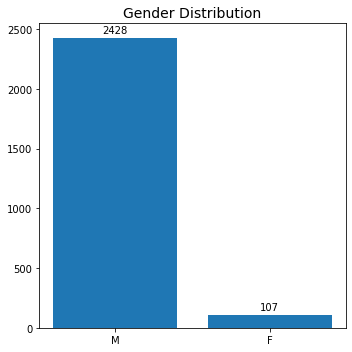

In [90]:
plt.figure(figsize=(5,5))
Grafik=plt.bar(TersToplamm.index,TersToplamm["manner_of_death"])
plt.title("Gender Distribution", fontsize=14)
for bar in Grafik:
  plt.annotate(format(bar.get_height(), '.0f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points', fontsize=10)
plt.tight_layout()

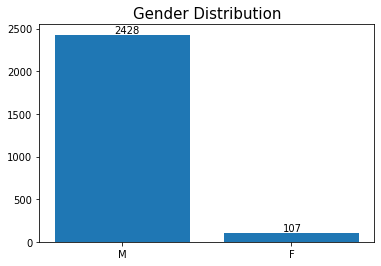

In [ ]:
# with matplotlib


## 2: Plot 7 most common kill weapons

In [60]:
kill.armed.value_counts().head(7)

gun             1398
knife            373
vehicle          177
unarmed          171
undetermined     117
toy weapon       104
machete           18
Name: armed, dtype: int64

In [65]:
Toplamgun= kill.groupby(kill["armed"]).count().sort_values(by=['name'], ascending=False).head(7)
Toplamgun

,id,name,date,manner_of_death,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
armed,,,,,,,,,,,,,
gun,1398,1398,1398,1398,1356,1398,1289,1398,1398,1398,1398,1370,1398
knife,373,373,373,373,357,373,338,373,373,373,373,364,373
vehicle,177,177,177,177,172,177,165,177,177,177,177,171,177
unarmed,171,171,171,171,170,171,170,171,171,171,171,167,171
undetermined,117,117,117,117,112,117,101,117,117,117,117,103,117
toy weapon,104,104,104,104,103,104,102,104,104,104,104,104,104
unknown weapon,18,18,18,18,16,18,16,18,18,18,18,16,18


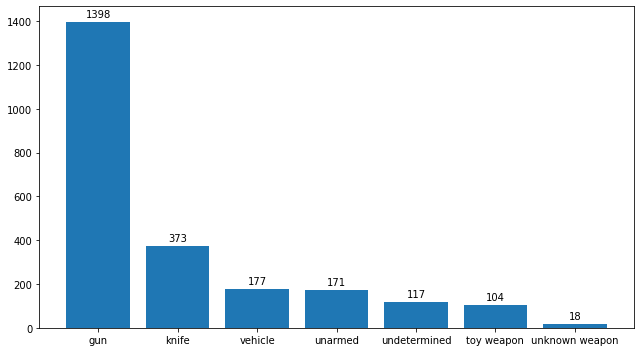

In [84]:
from IPython.core.pylabtools import figsize
plt.figure(figsize=(9,5))
Grafikgun=plt.bar(Toplamgun.index,Toplamgun["id"])
for bar in Grafikgun:
  plt.annotate(format(bar.get_height(), '.0f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points', fontsize=10)
plt.tight_layout()
plt.show()

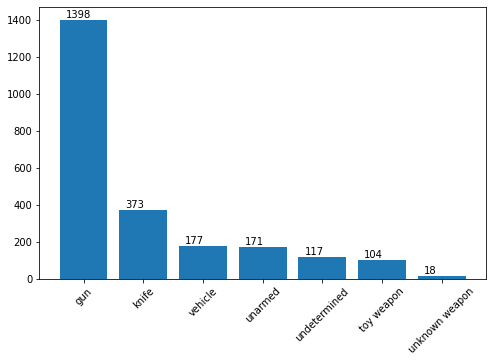

In [ ]:
# with matplotlib


## 3: Plot number of age of killed people under two groups : Under 25 and Above 25

In [91]:
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [160]:
kill["age_cat"]= "above25"
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,age_cat
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,above25
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,above25
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,above25
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,above25
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,above25


In [108]:
kill.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2535 entries, 0 to 2534
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       2535 non-null   int64  
 1   name                     2535 non-null   object 
 2   date                     2535 non-null   object 
 3   manner_of_death          2535 non-null   object 
 4   armed                    2526 non-null   object 
 5   age                      2458 non-null   float64
 6   gender                   2535 non-null   object 
 7   race                     2340 non-null   object 
 8   city                     2535 non-null   object 
 9   state                    2535 non-null   object 
 10  signs_of_mental_illness  2535 non-null   bool   
 11  threat_level             2535 non-null   object 
 12  flee                     2470 non-null   object 
 13  body_camera              2535 non-null   bool   
 14  age_cat                 

In [115]:
kill[kill["age_cat"]="below25"] if i in kill["age"]<25  #olmadı

SyntaxError: ignored

In [ ]:
for i in kill.age_cat:
  for j in kill.age:
    if j in kill.age <25:
      kill["age_cat"].transform("below25")    # olmadı

In [141]:
def degisim(x):
  if kill["age"]<25:
    kill["age_cat"] = "below25"   #olmadı
          


In [ ]:
kill.groupby("age").apply(degisim)   #olmadı

In [209]:
cıkar=kill[kill["age"]<=25].index
cıkar

Int64Index([   2,    5,    6,   10,   22,   26,   34,   39,   40,   48,
            ...
            2477, 2495, 2497, 2504, 2505, 2509, 2516, 2519, 2523, 2526],
           dtype='int64', length=553)

In [179]:
kill["age_cat"][cıkar]="below25"

In [154]:
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,age_cat
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,above25
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,above25
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,below25
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,above25
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,above25


In [163]:
kill.age_cat.value_counts()

above25    1982
below25     553
Name: age_cat, dtype: int64

In [159]:
kill.age_cat.value_counts(dropna=True)

above25    1982
below25     553
Name: age_cat, dtype: int64

In [156]:
kill.age_cat.fillna('below25', inplace=True) # olmadı

In [157]:
kill.age_cat.value_counts()

above25    1982
below25     553
Name: age_cat, dtype: int64

In [191]:
kill.age.isnull().value_counts()

False    2458
True       77
Name: age, dtype: int64

In [203]:
kill.age.value_counts(dropna=True).sum()

2458

In [208]:
kill.age_cat.isnull().value_counts()

False    2535
Name: age_cat, dtype: int64

In [206]:
kill[kill["age"]==np.nan].fillna({"age_cat":'below25'}, inplace=True) # olmadı

In [207]:
kill.age_cat.value_counts(dropna=True)

above25    1982
below25     553
Name: age_cat, dtype: int64

In [211]:
sorunlu=kill[kill["age_cat"]==np.nan].index # olmadı
sorunlu

Int64Index([], dtype='int64')

In [214]:
sorunlu=kill[kill.age.isnull()==True].index
sorunlu

Int64Index([ 124,  658,  707,  769,  802,  818,  928,  936,  950,  962,  987,
            1334, 1349, 1382, 1385, 1397, 1419, 1442, 1460, 1470, 1483, 1495,
            1500, 1646, 1654, 1655, 1735, 1825, 1827, 1877, 1894, 1896, 1921,
            1927, 1933, 1936, 1949, 2045, 2078, 2091, 2137, 2158, 2161, 2195,
            2199, 2222, 2247, 2259, 2292, 2307, 2314, 2326, 2341, 2347, 2353,
            2354, 2383, 2391, 2418, 2419, 2429, 2435, 2438, 2441, 2444, 2450,
            2452, 2453, 2455, 2470, 2473, 2485, 2488, 2496, 2521, 2528, 2531],
           dtype='int64')

In [215]:
kill["age_cat"][sorunlu]="below25"

In [216]:
kill.age_cat.value_counts()

above25    1905
below25     630
Name: age_cat, dtype: int64

above25    1905
below25     630
Name: age_cat, dtype: int64

In [217]:
Toplamyas= kill.groupby(kill["age_cat"]).count()
Toplamyas


,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
age_cat,,,,,,,,,,,,,,
above25,1905,1905,1905,1905,1897,1905,1905,1779,1905,1905,1905,1905,1861,1905
below25,630,630,630,630,629,553,630,561,630,630,630,630,609,630


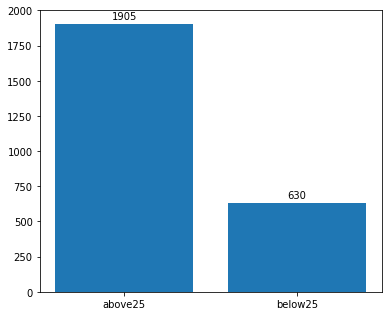

In [223]:
plt.figure(figsize=(5.5,4.5))
Grafikyas=plt.bar(Toplamyas.index,Toplamyas["id"])
for bar in Grafikyas:
  plt.annotate(format(bar.get_height(), '.0f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points', fontsize=10)
plt.tight_layout()

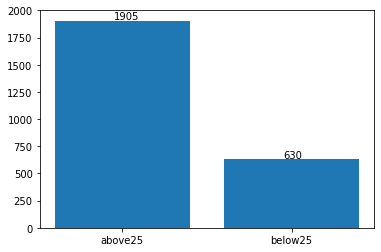

In [ ]:
# with matplotlib


## 4: Plot number of killed poeple by race

In [224]:
kill.race.value_counts()

W    1201
B     618
H     423
A      39
N      31
O      28
Name: race, dtype: int64

W    1201
B     618
H     423
A      39
N      31
O      28
Name: race, dtype: int64

In [229]:
Toplamrace= kill.groupby(kill["race"]).count().sort_values(by="manner_of_death", ascending=False)
Toplamrace

,id,name,date,manner_of_death,armed,age,gender,city,state,signs_of_mental_illness,threat_level,flee,body_camera,age_cat
race,,,,,,,,,,,,,,
W,1201,1201,1201,1201,1200,1192,1201,1201,1201,1201,1201,1178,1201,1201
B,618,618,618,618,614,609,618,618,618,618,618,605,618,618
H,423,423,423,423,422,413,423,423,423,423,423,411,423,423
A,39,39,39,39,39,38,39,39,39,39,39,37,39,39
N,31,31,31,31,31,31,31,31,31,31,31,29,31,31
O,28,28,28,28,28,28,28,28,28,28,28,28,28,28


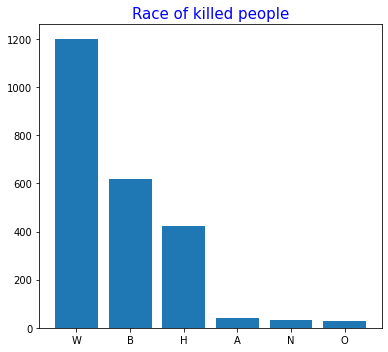

In [234]:
plt.figure(figsize=(5.5,5))
Grafikrace=plt.bar(Toplamrace.index,Toplamrace["id"])
plt.title("Race of killed people", fontsize=15, color="blue")
plt.tight_layout()

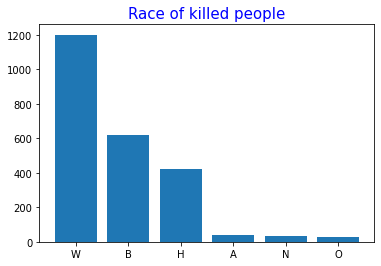

In [ ]:
# with matplotlib


## 5: Killed People According to Races (Pie Chart)

In [235]:
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,age_cat
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,above25
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,above25
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,below25
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,above25
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,above25


In [237]:
kill.race.value_counts(dropna=False)

W      1201
B       618
H       423
NaN     195
A        39
N        31
O        28
Name: race, dtype: int64

In [238]:
kill.race.unique()

array(['A', 'W', 'H', 'B', 'O', nan, 'N'], dtype=object)

array(['A', 'W', 'H', 'B', 'O', nan, 'N'], dtype=object)

W      1201
B       618
H       423
NaN     195
A        39
N        31
O        28
Name: race, dtype: int64

Problem: missing value on race column.

**INSTRUCTION-1: Drop the all raws that contain missing value (dropna)**

In [242]:
kill.value_counts(dropna=False).sum()

2535

In [246]:
kill.dropna(how="any", inplace=True)

In [247]:
kill.shape

(2254, 15)

(2254, 15)

**INSTRUCTION-2: Demonstrate Race Ratio of Killed People by a Pie Chart (You can use Matplotlib)**

In [248]:
kill.race.value_counts(dropna=False)

W    1168
B     592
H     401
A      36
N      29
O      28
Name: race, dtype: int64

W    1168
B     592
H     401
A      36
N      29
O      28
Name: race, dtype: int64

In [249]:
kill.race.unique()

array(['A', 'W', 'H', 'B', 'O', 'N'], dtype=object)

In [294]:
Toplamrace.index

Index(['W', 'B', 'H', 'A', 'N', 'O'], dtype='object', name='race')

Index(['W', 'B', 'H', 'A', 'N', 'O'], dtype='object')

In [280]:
benböyleyaptım=kill.groupby("race").count()
benböyleyaptım


,id,name,date,manner_of_death,armed,age,gender,city,state,signs_of_mental_illness,threat_level,flee,body_camera,age_cat
race,,,,,,,,,,,,,,
A,36,36,36,36,36,36,36,36,36,36,36,36,36,36
B,592,592,592,592,592,592,592,592,592,592,592,592,592,592
H,401,401,401,401,401,401,401,401,401,401,401,401,401,401
N,29,29,29,29,29,29,29,29,29,29,29,29,29,29
O,28,28,28,28,28,28,28,28,28,28,28,28,28,28
W,1168,1168,1168,1168,1168,1168,1168,1168,1168,1168,1168,1168,1168,1168


In [299]:
steptwo=benböyleyaptım["id"].value_counts().index.sort_values(ascending=False)
steptwo


Int64Index([1168, 592, 401, 36, 29, 28], dtype='int64')

array([1168,  592,  401,   36,   29,   28])

([<matplotlib.patches.Wedge at 0x7fbdb1f400d0>,
 [Text(-2.692611179292371, 0.5588783742011739, 'W'),
  Text(1.724070134092137, -2.1424477059502576, 'B'),
  Text(2.866288239612795, 1.5319568295018575, 'H'),
  Text(1.2475624952896676, 2.4507320988526304, 'A'),
  Text(1.0207231381122301, 2.5535513065772384, 'N'),
  Text(0.8148480901829056, 2.626503872056021, 'O')],
 [Text(-1.4686970068867478, 0.3048427495642767, '51.8%'),
  Text(0.9404018913229837, -1.1686078396092314, '26.3%'),
  Text(1.7638696859155663, 0.9427426643088354, '17.8%'),
  Text(0.6804886337943641, 1.3367629630105258, '1.6%'),
  Text(0.5567580753339436, 1.3928461672239483, '1.3%'),
  Text(0.44446259464522125, 1.4326384756669206, '1.2%')])

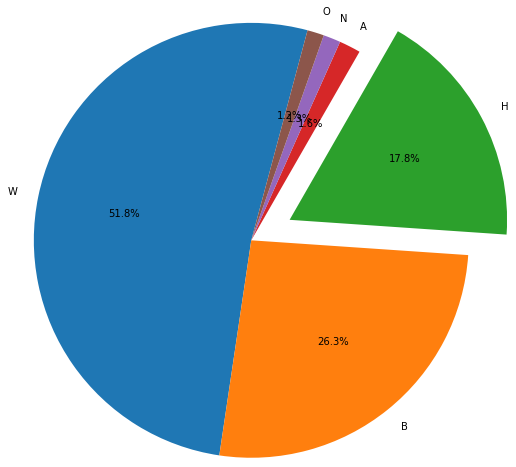

In [320]:
plt.pie(steptwo, labels=Toplamrace.index, explode=[0,0,0.5,0,0,0], startangle=75,radius=2.5, autopct="%0.1f%%")

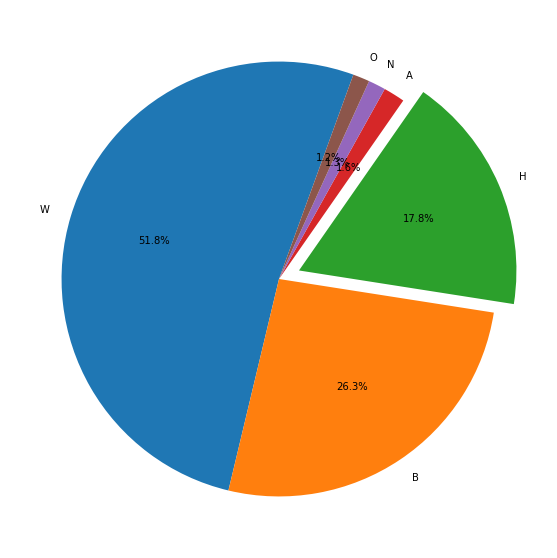

In [ ]:
# matplotlib

